In [11]:
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

food_orders = pd.read_csv("D:\onlinefoods.csv")

In [12]:
food_orders.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [13]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [14]:
food_orders.drop(['Unnamed: 12','Pin code'], axis = 1, inplace = True)

In [15]:
food_orders.describe(exclude = float)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
count,388.000000,388,388,388,388,388,388.000000,388,388
unique,NaN,2,3,4,5,5,NaN,2,2
top,NaN,Male,Single,Student,No Income,Graduate,NaN,Yes,Positive
freq,NaN,222,268,207,187,177,NaN,301,317
mean,24.628866,NaN,NaN,NaN,NaN,NaN,3.280928,NaN,NaN
std,2.975593,NaN,NaN,NaN,NaN,NaN,1.351025,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,23.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
50%,24.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
75%,26.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


In [16]:
fig = px.histogram(food_orders, x = 'Age', color = 'Feedback')
fig.update_layout(bargap = 0.2)
fig.show()

In [17]:
fig = px.histogram(food_orders, x = 'Family size', color = 'Feedback')
fig.update_layout(bargap = 0.2)
fig.show()

In [18]:
object_columns = food_orders.select_dtypes(include=['object'])


for column in object_columns.columns:
    value_counts = object_columns[column].value_counts()
    df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})

    fig = px.pie(df_counts, values='count', names='value', title=f'Pie Chart of {column}')
    fig.show()

In [19]:
agg_food_orders = food_orders.groupby(['latitude','longitude'])['Output'].value_counts().unstack().reset_index()
agg_food_orders

Output,latitude,longitude,No,Yes
0,12.8652,77.5240,NaN,1.0
1,12.8834,77.5486,NaN,2.0
2,12.8845,77.6036,NaN,12.0
3,12.8893,77.6399,1.0,3.0
4,12.8988,77.5764,NaN,5.0
...,...,...,...,...
72,13.0626,77.5284,3.0,4.0
73,13.0641,77.5931,3.0,2.0
74,13.0734,77.5464,1.0,3.0
75,13.0809,77.5565,2.0,NaN


In [20]:
fig = px.scatter_mapbox(agg_food_orders,                   
                        lat='latitude',                    
                        lon='longitude',                   
                        color='Yes',               
                        mapbox_style="carto-positron",     
                        zoom=10,                            
                        center={"lat": 12.9716, "lon": 77.5946},  
                        opacity=0.75,                       
                        )

fig.update_layout(title_text='Scatter Map of Repeated Food Orders')

fig.show()


In [21]:
fig = px.scatter_mapbox(agg_food_orders,                   
                        lat='latitude',                    
                        lon='longitude',                   
                        color='No',               
                        mapbox_style="carto-positron",     
                        zoom=10,                            
                        center={"lat": 12.9716, "lon": 77.5946},  
                        opacity=0.75,                       
                        )
# Update layout to include title
fig.update_layout(title_text='Scatter Map of Non-Repeated Food Orders')

# Show the map
fig.show()

In [22]:
le = LabelEncoder()

In [23]:
for c in food_orders.columns:
    if food_orders[c].dtype == 'object':
        food_orders[c] = le.fit_transform(food_orders[c])

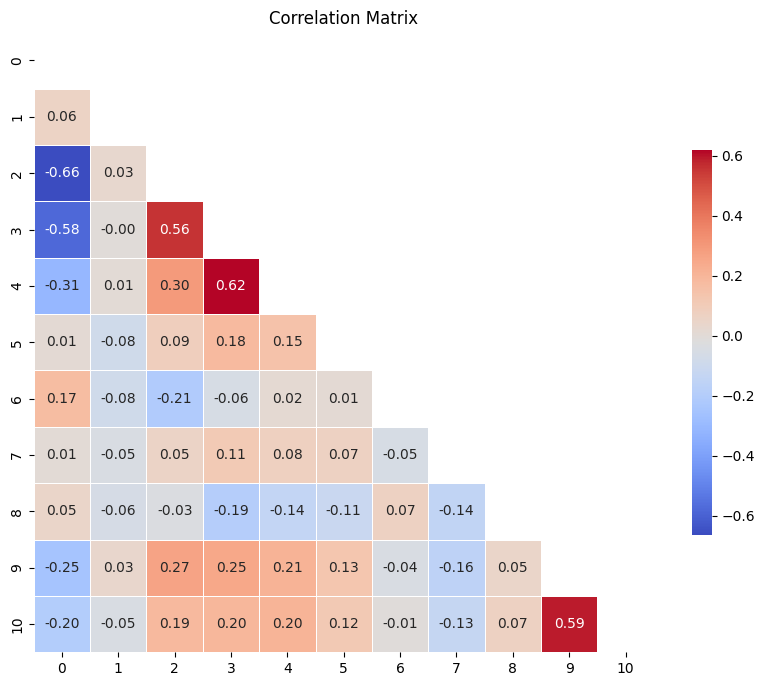

In [24]:
corr_matrix = np.corrcoef(food_orders, rowvar=False)

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask = mask,annot=True,cmap = "coolwarm", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()